In [283]:
import pandas as pd

from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

# Custom helper functions

In [284]:
def can_be_cast_to_type(value, type_to_cast):
    try:
        type_to_cast(value)
        
        return True
    except:
        return False
    
def get_metrics(y_true, y_pred):
    f1 = f1_score(y_true, y_pred, average='macro')
    f1_w = f1_score(y_true, y_pred, average='weighted')
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    
    return f1, f1_w, acc, precision, recall

# Data Loading

In [3]:
df = pd.read_csv('dataset_SCL.csv')

/Users/rodolfo.galvez/.envs/p38/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3172: DtypeWarning: Columns (1,6) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.head()

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
0,2017-01-01 23:30:00,226,SCEL,KMIA,AAL,2017-01-01 23:33:00,226,SCEL,KMIA,AAL,1,1,2017,Domingo,I,American Airlines,Santiago,Miami
1,2017-01-02 23:30:00,226,SCEL,KMIA,AAL,2017-01-02 23:39:00,226,SCEL,KMIA,AAL,2,1,2017,Lunes,I,American Airlines,Santiago,Miami
2,2017-01-03 23:30:00,226,SCEL,KMIA,AAL,2017-01-03 23:39:00,226,SCEL,KMIA,AAL,3,1,2017,Martes,I,American Airlines,Santiago,Miami
3,2017-01-04 23:30:00,226,SCEL,KMIA,AAL,2017-01-04 23:33:00,226,SCEL,KMIA,AAL,4,1,2017,Miercoles,I,American Airlines,Santiago,Miami
4,2017-01-05 23:30:00,226,SCEL,KMIA,AAL,2017-01-05 23:28:00,226,SCEL,KMIA,AAL,5,1,2017,Jueves,I,American Airlines,Santiago,Miami


# Data exploration

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68206 entries, 0 to 68205
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Fecha-I    68206 non-null  object
 1   Vlo-I      68206 non-null  object
 2   Ori-I      68206 non-null  object
 3   Des-I      68206 non-null  object
 4   Emp-I      68206 non-null  object
 5   Fecha-O    68206 non-null  object
 6   Vlo-O      68205 non-null  object
 7   Ori-O      68206 non-null  object
 8   Des-O      68206 non-null  object
 9   Emp-O      68206 non-null  object
 10  DIA        68206 non-null  int64 
 11  MES        68206 non-null  int64 
 12  AÑO        68206 non-null  int64 
 13  DIANOM     68206 non-null  object
 14  TIPOVUELO  68206 non-null  object
 15  OPERA      68206 non-null  object
 16  SIGLAORI   68206 non-null  object
 17  SIGLADES   68206 non-null  object
dtypes: int64(3), object(15)
memory usage: 9.4+ MB


## Fecha-I

Casting to datetime:

In [50]:
df['Fecha-I'] = pd.to_datetime(df['Fecha-I'])

## Vlo-I

In [6]:
df['Vlo-I'].astype('category')

0        226
1        226
2        226
3        226
4        226
        ... 
68201    400
68202    400
68203    400
68204    400
68205    400
Name: Vlo-I, Length: 68206, dtype: category
Categories (750, object): [4, 6, 8, 10, ..., '991', '993', '9955', '9956']

<AxesSubplot:>

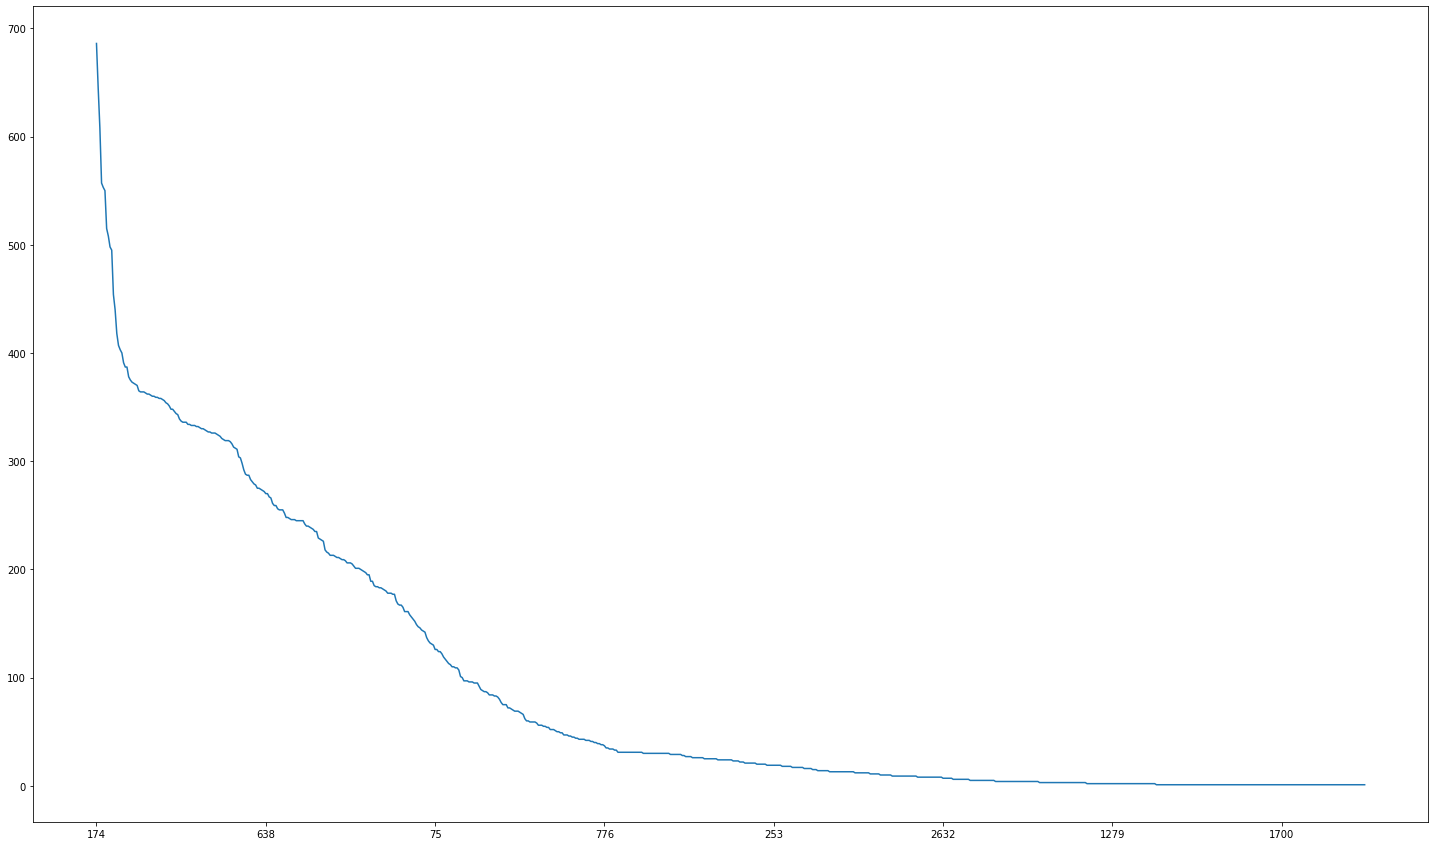

In [7]:
df['Vlo-I'].value_counts().plot.line(figsize=(25,15))

Y axis: count  
X axis: Vlo-I value  
There are few Vlo-I values that have high count numbers, which means they are scheduled more frequently.

Mixed types found, looking if they can be cast to int

In [8]:
df[df['Vlo-I'].map(lambda x: not can_be_cast_to_type(x, int))]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
22232,2017-05-13 21:50:00,989P,SCEL,SUMU,AAL,2017-05-13 21:52:00,989,SCEL,SUMU,AAL,13,5,2017,Sabado,I,American Airlines,Santiago,Montevideo
27464,2017-06-16 20:30:00,940P,SCEL,KDFW,AAL,2017-06-16 20:50:00,940,SCEL,KDFW,AAL,16,6,2017,Viernes,I,American Airlines,Santiago,Dallas
39225,2017-08-07 19:00:00,591P,SCEL,LFPG,PUE,2017-08-07 20:35:00,591P,SCEL,LFPG,PUE,7,8,2017,Lunes,I,Plus Ultra Lineas Aereas,Santiago,Paris
39266,2017-08-24 23:00:00,846A,SCEL,KIAH,UAL,2017-08-24 23:00:00,2804,SCEL,KIAH,UAL,24,8,2017,Jueves,I,United Airlines,Santiago,Houston
58126,2017-11-05 17:00:00,1104A,SCEL,SCSE,SKU,2017-11-05 17:42:00,1104,SCEL,SCSE,SKU,5,11,2017,Domingo,N,Sky Airline,Santiago,La Serena


Some Vlo-I values contain letters, everything will be casted as string

In [9]:
df['Vlo-I'] = df['Vlo-I'].astype('string')

## Ori-I

In [10]:
df['Ori-I'].astype('category')

0        SCEL
1        SCEL
2        SCEL
3        SCEL
4        SCEL
         ... 
68201    SCEL
68202    SCEL
68203    SCEL
68204    SCEL
68205    SCEL
Name: Ori-I, Length: 68206, dtype: category
Categories (1, object): ['SCEL']

Same value across all records, this field won't be considered.

## Des-I

In [11]:
df['Des-I'].astype('category')

0        KMIA
1        KMIA
2        KMIA
3        KMIA
4        KMIA
         ... 
68201    SPJC
68202    SPJC
68203    SPJC
68204    SPJC
68205    SPJC
Name: Des-I, Length: 68206, dtype: category
Categories (64, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']

<AxesSubplot:>

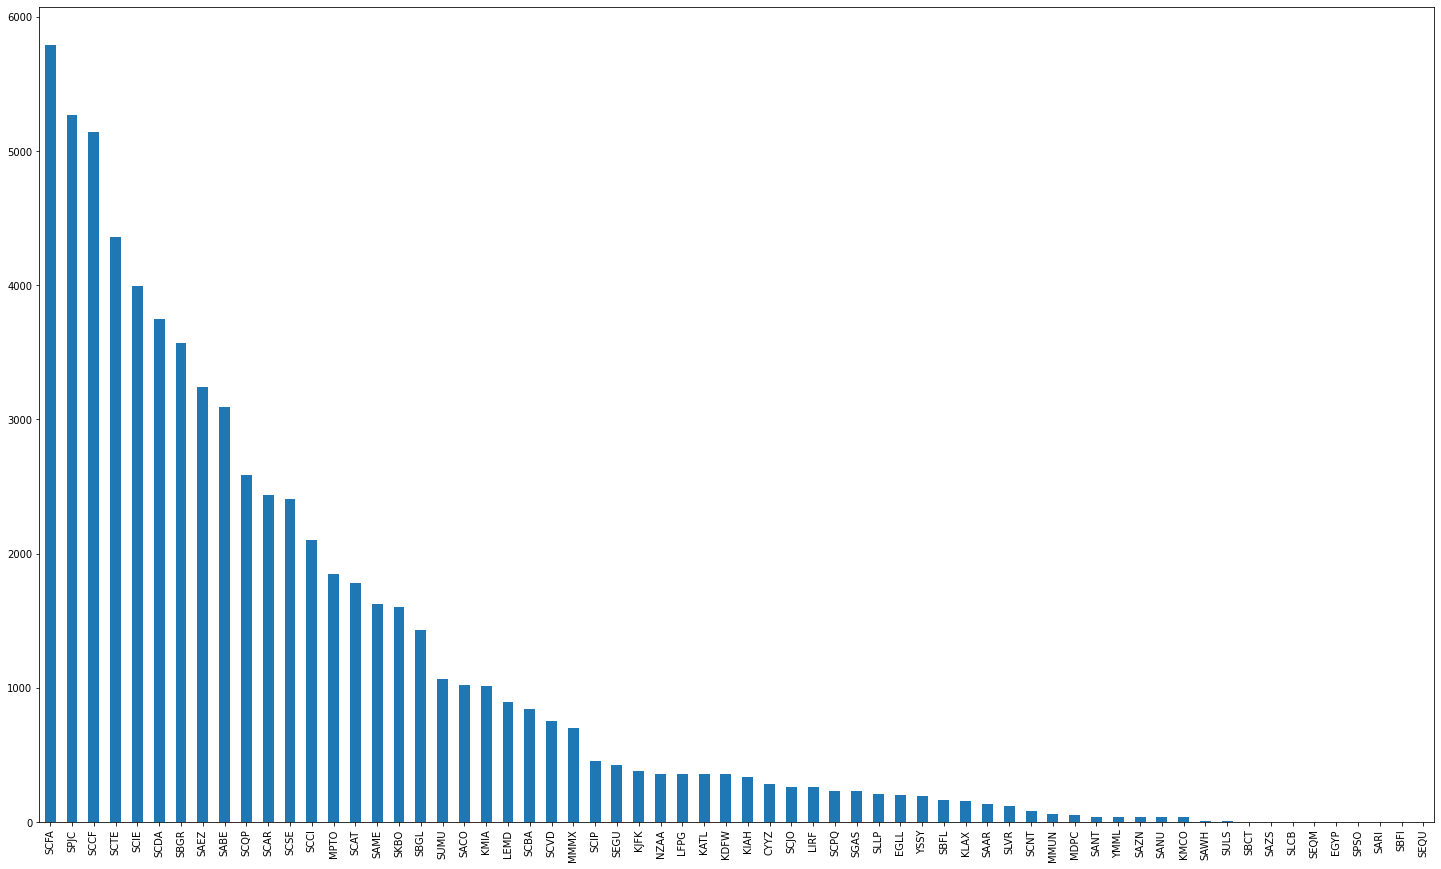

In [12]:
df['Des-I'].value_counts().plot.bar(figsize=(25,15))

Definitely there are few cities that are scheduled more frequently as well.

## Emp-I

In [13]:
df['Emp-I'].astype('category')

0        AAL
1        AAL
2        AAL
3        AAL
4        AAL
        ... 
68201    JAT
68202    JAT
68203    JAT
68204    JAT
68205    JAT
Name: Emp-I, Length: 68206, dtype: category
Categories (30, object): ['AAL', 'ACA', 'AFR', 'AMX', ..., 'QFU', 'SKU', 'TAM', 'UAL']

In [14]:
df['Emp-I'].value_counts().describe()

count       30.000000
mean      2273.533333
std       7163.120100
min          1.000000
25%        123.750000
50%        343.000000
75%       1022.750000
max      37611.000000
Name: Emp-I, dtype: float64

<AxesSubplot:>

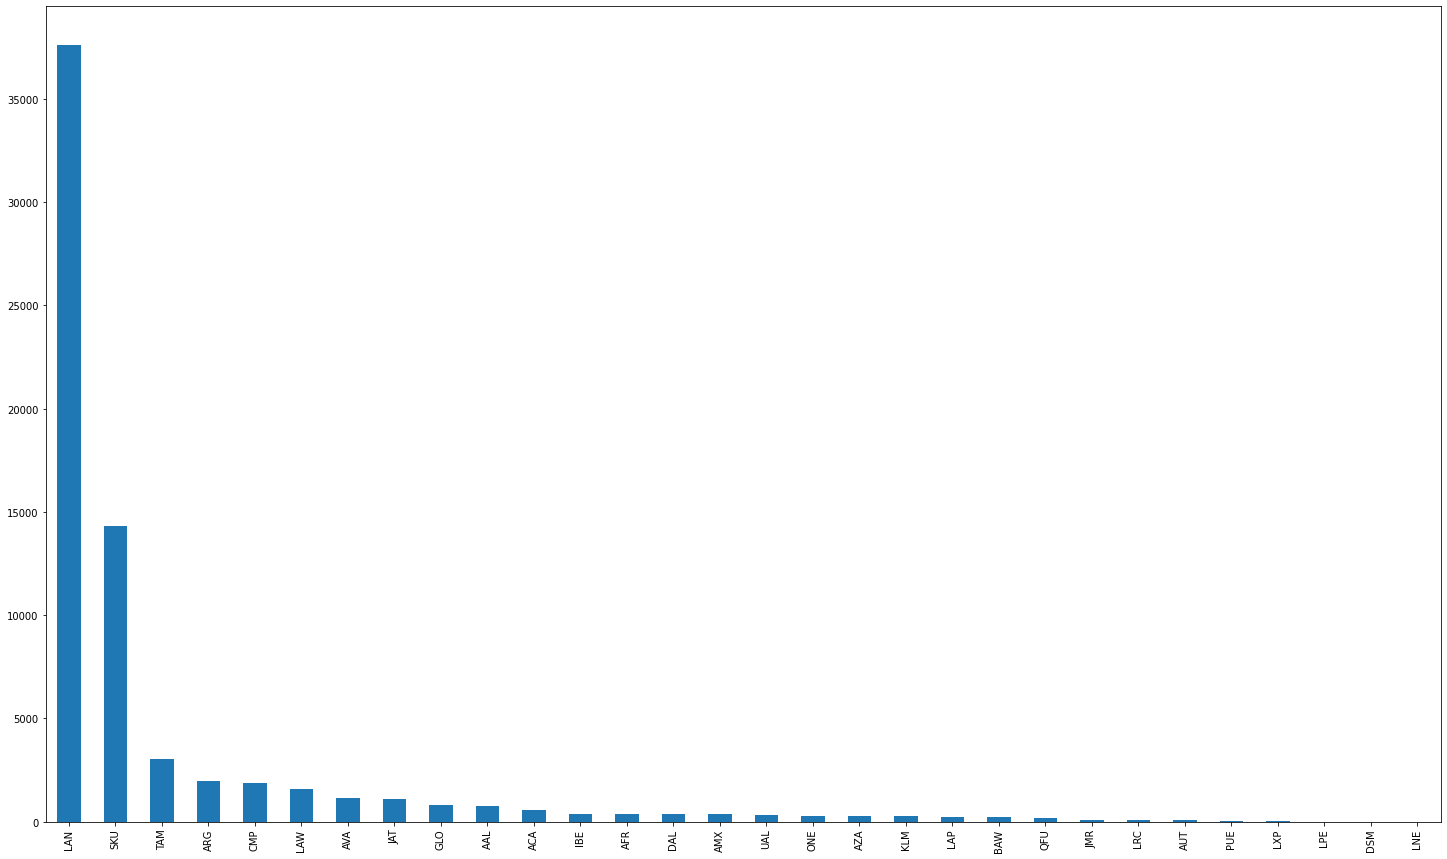

In [15]:
df['Emp-I'].value_counts().plot.bar(figsize=(25,15))

Most of the available information is from the LAN airline code.

## Fecha-O

Casting to datetime:

In [51]:
df['Fecha-O'] = pd.to_datetime(df['Fecha-O'])

## Vlo-O

In [16]:
df['Vlo-O'].astype('category')

0        226
1        226
2        226
3        226
4        226
        ... 
68201    400
68202    400
68203    400
68204    400
68205    400
Name: Vlo-O, Length: 68206, dtype: category
Categories (866, object): [4, 6, 8, 10, ..., '991', '993', '9955', '9956']

<AxesSubplot:>

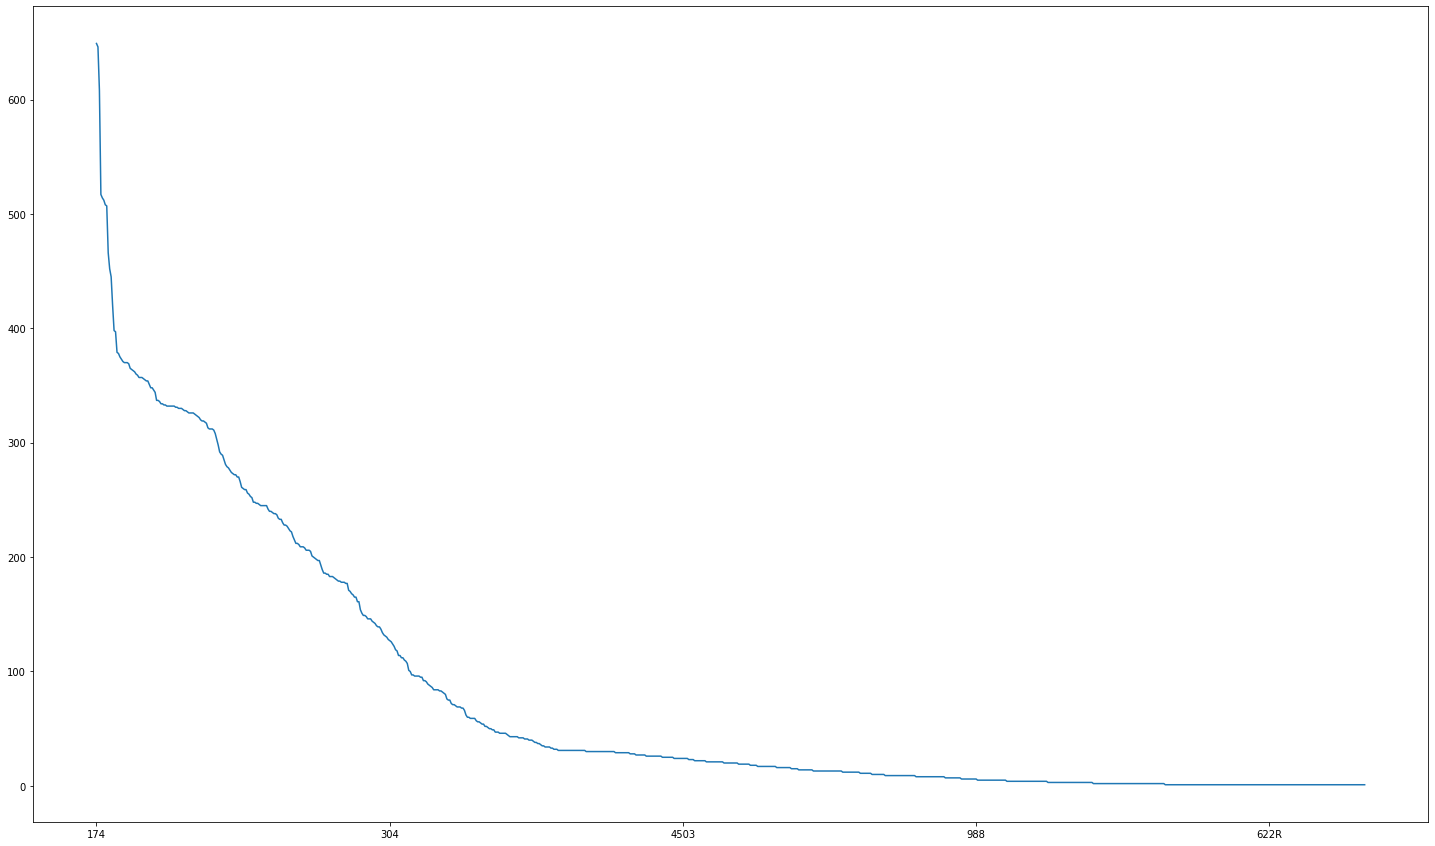

In [17]:
df['Vlo-O'].value_counts().plot.line(figsize=(25,15))

Y axis: count  
X axis: Vlo-I value  
It's quite similar than Vlo-I, but not the same, which means the actual Vlo-O isn't always as the scheduled Vlo-I.  
  
Also, mixed types found, looking if they can be cast to int

In [18]:
df[df['Vlo-O'].map(lambda x: not can_be_cast_to_type(x, int))]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
6068,2017-01-19 11:00:00,200,SCEL,SPJC,LAW,2017-01-19 11:03:00,NaN,SCEL,SPJC,56R,19,1,2017,Jueves,I,Latin American Wings,Santiago,Lima
13906,2017-03-30 10:30:00,71,SCEL,SCIE,SKU,2017-03-30 10:50:00,71R,SCEL,SCIE,SKU,30,3,2017,Jueves,N,Sky Airline,Santiago,Concepcion
13907,2017-03-22 11:00:00,1071,SCEL,SCIE,SKU,2017-03-22 11:00:00,71R,SCEL,SCIE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Concepcion
17055,2017-03-22 10:00:00,201,SCEL,SCIE,LXP,2017-03-22 11:50:00,201R,SCEL,SCIE,LXP,22,3,2017,Miercoles,N,Grupo LATAM,Santiago,Concepcion
19207,2017-04-25 09:00:00,71,SCEL,SCIE,SKU,2017-04-25 09:29:00,71R,SCEL,SCIE,SKU,25,4,2017,Martes,N,Sky Airline,Santiago,Concepcion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65531,2017-12-12 15:30:00,265,SCEL,SCTE,LAN,2017-12-12 15:32:00,265.0,SCEL,SCTE,LXP,12,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt
65532,2017-12-16 13:41:00,265,SCEL,SCTE,LAN,2017-12-16 13:49:00,265.0,SCEL,SCTE,LXP,16,12,2017,Sabado,N,Grupo LATAM,Santiago,Puerto Montt
65533,2017-12-18 15:59:00,265,SCEL,SCTE,LAN,2017-12-18 16:07:00,265.0,SCEL,SCTE,LXP,18,12,2017,Lunes,N,Grupo LATAM,Santiago,Puerto Montt
65534,2017-12-19 15:11:00,265,SCEL,SCTE,LAN,2017-12-19 15:10:00,265.0,SCEL,SCTE,LXP,19,12,2017,Martes,N,Grupo LATAM,Santiago,Puerto Montt


- NaN value found, looking if can be filled with 0 in case 0 doesn't exist.
- Float numbers stored as string, they will be casted to float, then to int (to get rid of the decimal part) and then to string (to be the same as Vlo-I).

### Filling NaN

In [19]:
df[(df['Vlo-O'] == 0) | (df['Vlo-I'] == 0)]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES


In [20]:
df[['Vlo-O']] = df[['Vlo-O']].fillna(value=0)

### Fixing types

In [21]:
df['Vlo-O'] = df['Vlo-O'].apply(lambda x: int(float(x)) if can_be_cast_to_type(x, float) else x).astype('string')

### Comparing Vlo-I to Vlo-O

Retrieving records where Vlo-I is different than Vlo-O

In [22]:
df[df['Vlo-I'] != df['Vlo-O']][['Vlo-I', 'Vlo-O']]

,Vlo-I,Vlo-O
6018,4501,1001
6020,4501,1001
6022,4501,1003
6023,4501,1001
6025,4501,1001
...,...,...
60565,530,534
61354,7811,1103
61426,207,207R
62175,2287,1287


120 rows is a really small number compared to the 68k records, a new feature might not be helpful in this case.

## Ori-O

In [23]:
df['Ori-O'].astype('category')

0        SCEL
1        SCEL
2        SCEL
3        SCEL
4        SCEL
         ... 
68201    SCEL
68202    SCEL
68203    SCEL
68204    SCEL
68205    SCEL
Name: Ori-O, Length: 68206, dtype: category
Categories (1, object): ['SCEL']

Same value across all records, this field won't be considered.

## Des-O

In [24]:
df['Des-O'].astype('category')

0        KMIA
1        KMIA
2        KMIA
3        KMIA
4        KMIA
         ... 
68201    SPJC
68202    SPJC
68203    SPJC
68204    SPJC
68205    SPJC
Name: Des-O, Length: 68206, dtype: category
Categories (63, object): ['CYYZ', 'EGLL', 'EGYP', 'KATL', ..., 'SULS', 'SUMU', 'YMML', 'YSSY']

<AxesSubplot:>

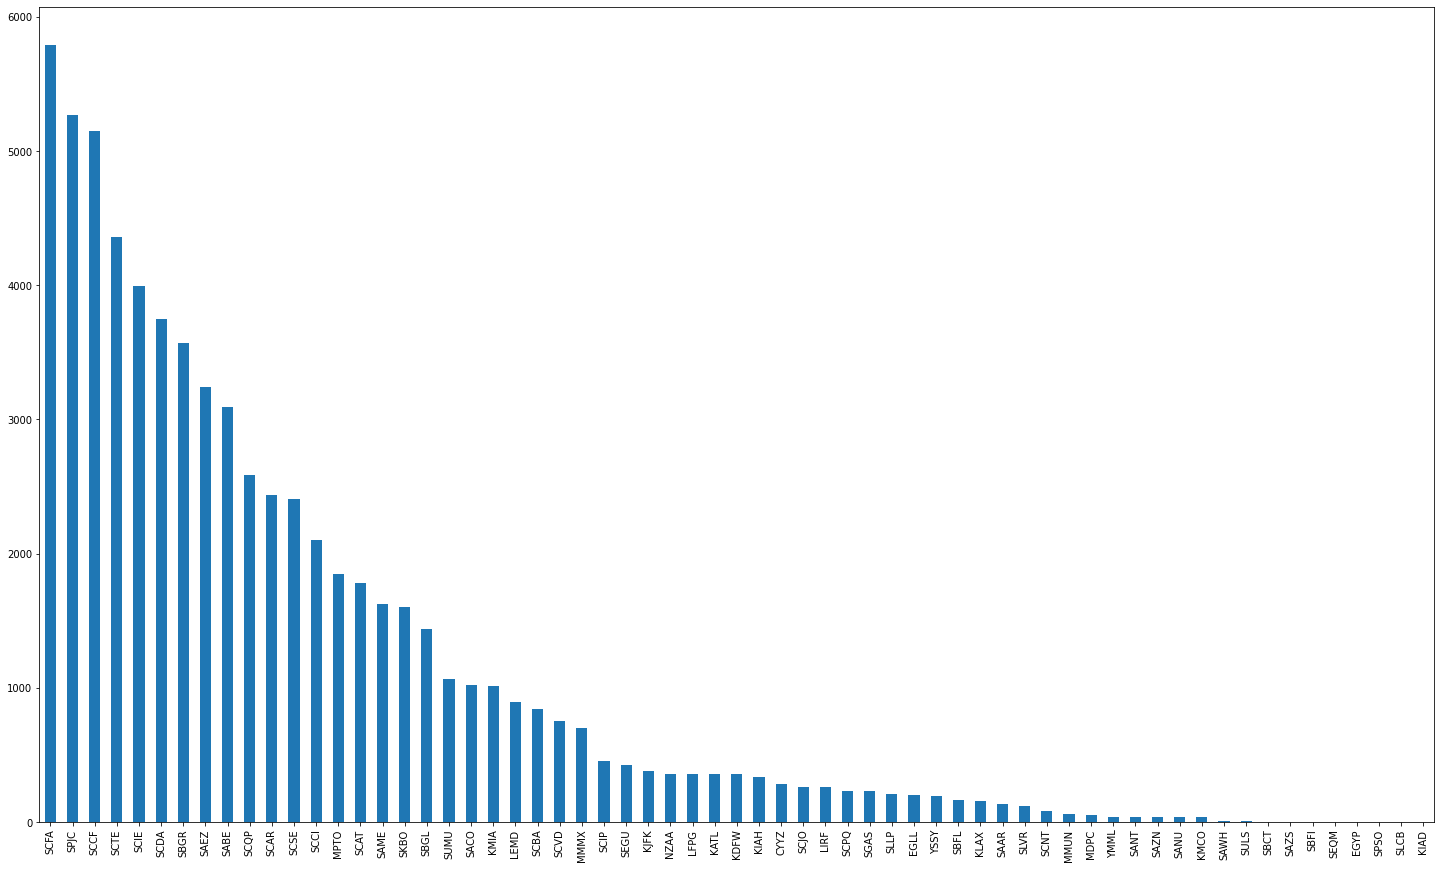

In [25]:
df['Des-O'].value_counts().plot.bar(figsize=(25,15))

Comparing Des-I to Des-O

In [26]:
df[df['Des-I'] != df['Des-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
1397,2017-01-17 19:20:00,25,SCEL,SCTE,SKU,2017-01-17 19:46:00,25,SCEL,SCQP,SKU,17,1,2017,Martes,N,Sky Airline,Santiago,Temuco
7290,2017-02-15 06:25:00,11,SCEL,SCTE,SKU,2017-02-15 06:25:00,11,SCEL,SCQP,SKU,15,2,2017,Miercoles,N,Sky Airline,Santiago,Temuco
7520,2017-02-27 06:40:00,71,SCEL,SCIE,SKU,2017-02-27 09:07:00,71,SCEL,SCQP,SKU,27,2,2017,Lunes,N,Sky Airline,Santiago,Temuco
8456,2017-02-15 06:10:00,57,SCEL,SCTE,LAN,2017-02-15 06:12:00,57,SCEL,SCQP,LAN,15,2,2017,Miercoles,N,Grupo LATAM,Santiago,Temuco
12787,2017-03-18 06:25:00,11,SCEL,SCTE,SKU,2017-03-18 06:29:00,11,SCEL,SCQP,SKU,18,3,2017,Sabado,N,Sky Airline,Santiago,Temuco
12823,2017-03-22 12:50:00,17,SCEL,SCBA,SKU,2017-03-22 12:48:00,17,SCEL,SCTE,SKU,22,3,2017,Miercoles,N,Sky Airline,Santiago,Puerto Montt
16169,2017-03-13 23:20:00,532,SCEL,KJFK,LAN,2017-03-14 01:35:00,1346,SCEL,KMIA,LAN,14,3,2017,Martes,I,Grupo LATAM,Santiago,Miami
16937,2017-03-22 17:00:00,1446,SCEL,SEGU,LAN,2017-03-22 17:11:00,1361,SCEL,SABE,LAN,22,3,2017,Miercoles,I,Grupo LATAM,Santiago,Buenos Aires
18293,2017-04-14 18:40:00,25,SCEL,SCTE,SKU,2017-04-14 18:48:00,25,SCEL,SCQP,SKU,14,4,2017,Viernes,N,Sky Airline,Santiago,Temuco
20444,2017-04-14 22:00:00,289,SCEL,SCTE,LAN,2017-04-14 22:01:00,289,SCEL,SCCI,LXP,14,4,2017,Viernes,N,Grupo LATAM,Santiago,Punta Arenas


In [27]:
len(df[df['Des-I'] != df['Des-O']])

28

There are few cases of this, a new feature might not be helpful in this case

## Emp-O

In [28]:
df['Emp-O'].astype('category')

0        AAL
1        AAL
2        AAL
3        AAL
4        AAL
        ... 
68201    JAT
68202    JAT
68203    JAT
68204    JAT
68205    JAT
Name: Emp-O, Length: 68206, dtype: category
Categories (32, object): ['48O', '56R', 'AAL', 'ACA', ..., 'SKU', 'TAM', 'TPU', 'UAL']

<AxesSubplot:>

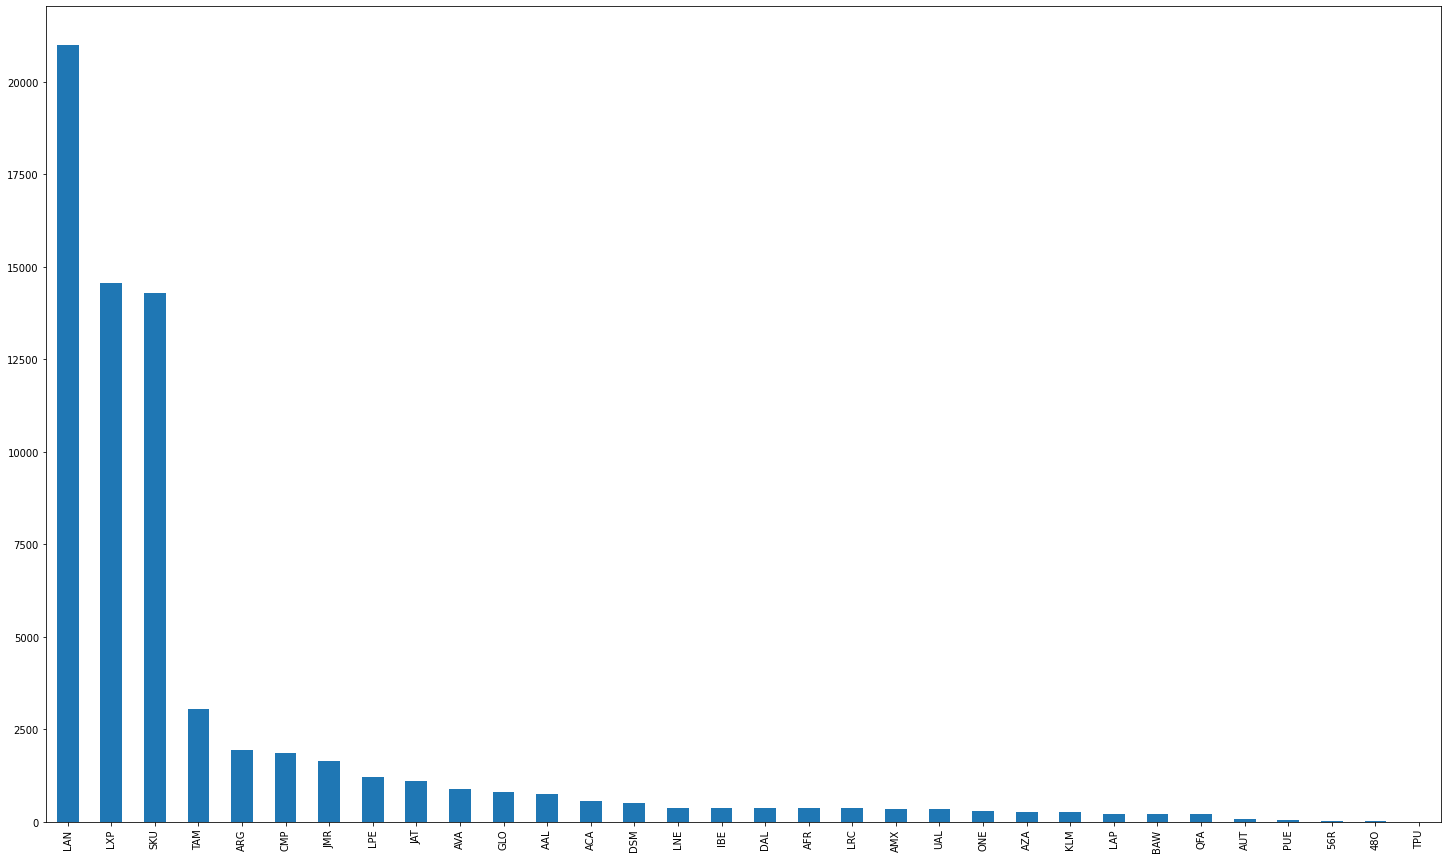

In [29]:
df['Emp-O'].value_counts().plot.bar(figsize=(25,15))

Comparing Emp-I to Emp-O

In [30]:
df[df['Emp-I'] != df['Emp-O']]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES
345,2017-01-21 22:30:00,2291,SCEL,SABE,AUT,2017-01-21 22:28:00,2291,SCEL,SABE,ARG,21,1,2017,Sabado,I,Austral,Santiago,Buenos Aires
814,2017-01-01 07:14:00,624,SCEL,SPJC,AVA,2017-01-01 07:11:00,624,SCEL,SPJC,LRC,1,1,2017,Domingo,I,Avianca,Santiago,Lima
815,2017-01-02 07:00:00,624,SCEL,SPJC,AVA,2017-01-02 07:05:00,624,SCEL,SPJC,LRC,2,1,2017,Lunes,I,Avianca,Santiago,Lima
816,2017-01-03 07:14:00,624,SCEL,SPJC,AVA,2017-01-03 07:14:00,624,SCEL,SPJC,LRC,3,1,2017,Martes,I,Avianca,Santiago,Lima
817,2017-01-04 07:00:00,624,SCEL,SPJC,AVA,2017-01-04 07:24:00,624,SCEL,SPJC,LRC,4,1,2017,Miercoles,I,Avianca,Santiago,Lima
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67877,2017-12-26 16:30:00,1033,SCEL,SCIE,LAW,2017-12-26 16:34:00,1033,SCEL,SCIE,JMR,26,12,2017,Martes,N,Latin American Wings,Santiago,Concepcion
67878,2017-12-27 16:30:00,1033,SCEL,SCIE,LAW,2017-12-27 16:30:00,1033,SCEL,SCIE,JMR,27,12,2017,Miercoles,N,Latin American Wings,Santiago,Concepcion
67879,2017-12-28 16:30:00,1033,SCEL,SCIE,LAW,2017-12-28 16:29:00,1033,SCEL,SCIE,JMR,28,12,2017,Jueves,N,Latin American Wings,Santiago,Concepcion
67880,2017-12-29 16:30:00,1033,SCEL,SCIE,LAW,2017-12-29 16:49:00,1033,SCEL,SCIE,JMR,29,12,2017,Viernes,N,Latin American Wings,Santiago,Concepcion


In this case, there are thousands of cases where the actual airline code differs from the scheduled one. Adding a new feature for this case: Emp-diff

In [31]:
df['Emp-diff'] = df['Emp-I'] != df['Emp-O']

## DIA

<AxesSubplot:>

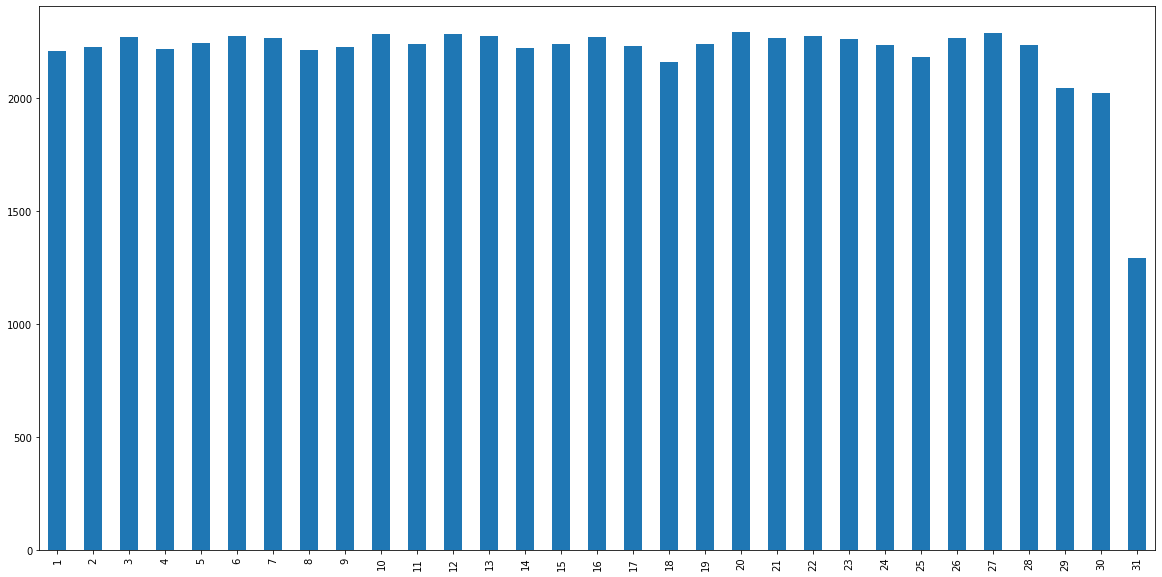

In [32]:
df['DIA'].value_counts(sort = False).plot.bar(figsize=(20,10))

Flights seem to be equally distributed across every day.  
31 is a special case because only 7 months have 31 days.  

## MES

<AxesSubplot:>

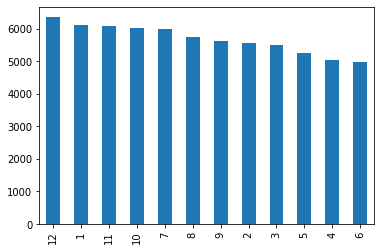

In [33]:
df['MES'].value_counts().plot.bar()

<AxesSubplot:>

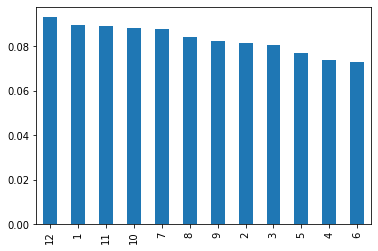

In [34]:
df['MES'].value_counts(normalize=True).plot.bar()

- April, May and June are months with less flights compared to the rest.
- December is the month with most filghts, followed by January, November, October and July.

## AÑO

<AxesSubplot:>

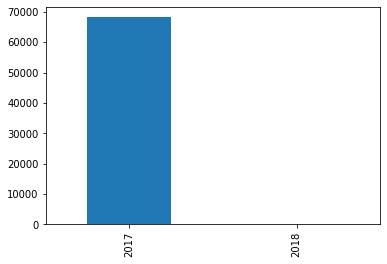

In [35]:
df['AÑO'].value_counts(sort = False).plot.bar()

In [36]:
df[df['AÑO'] == 2018]

,Fecha-I,Vlo-I,Ori-I,Des-I,Emp-I,Fecha-O,Vlo-O,Ori-O,Des-O,Emp-O,DIA,MES,AÑO,DIANOM,TIPOVUELO,OPERA,SIGLAORI,SIGLADES,Emp-diff
66918,2017-12-31 23:55:00,602,SCEL,KLAX,LAN,2018-01-01 00:02:00,602,SCEL,KLAX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Los Angeles,False
66947,2017-12-31 23:40:00,622,SCEL,MMMX,LAN,2018-01-01 00:12:00,622,SCEL,MMMX,LAN,1,1,2018,Lunes,I,Grupo LATAM,Santiago,Ciudad de Mexico,False


Only 2 records are from 2018, AÑO doesn't seem to be a field useful in this case.

## DIANOM

<AxesSubplot:>

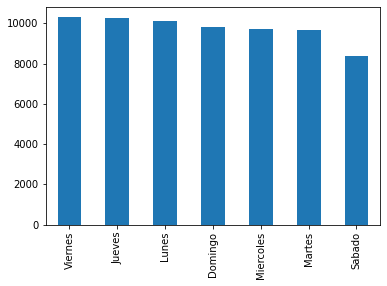

In [37]:
df['DIANOM'].value_counts().plot.bar()

Saturdays are days with less flights compared to the rest, but is still relevant.

## TIPOVUELO

<AxesSubplot:>

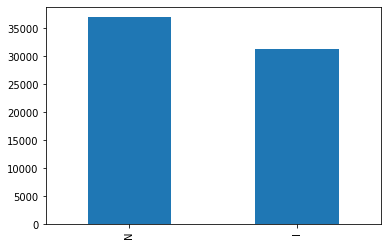

In [38]:
df['TIPOVUELO'].value_counts().plot.bar()

<AxesSubplot:>

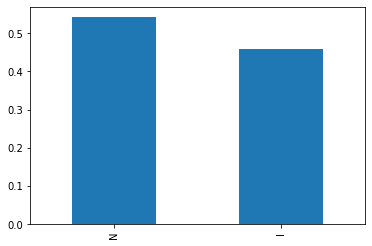

In [39]:
df['TIPOVUELO'].value_counts(normalize=True).plot.bar()

More than half of the flights are National ones, but International flights are close to that.

## OPERA

In [40]:
df['OPERA'].astype('category')

0        American Airlines
1        American Airlines
2        American Airlines
3        American Airlines
4        American Airlines
               ...        
68201         JetSmart SPA
68202         JetSmart SPA
68203         JetSmart SPA
68204         JetSmart SPA
68205         JetSmart SPA
Name: OPERA, Length: 68206, dtype: category
Categories (23, object): ['Aerolineas Argentinas', 'Aeromexico', 'Air Canada', 'Air France', ..., 'Plus Ultra Lineas Aereas', 'Qantas Airways', 'Sky Airline', 'United Airlines']

<AxesSubplot:>

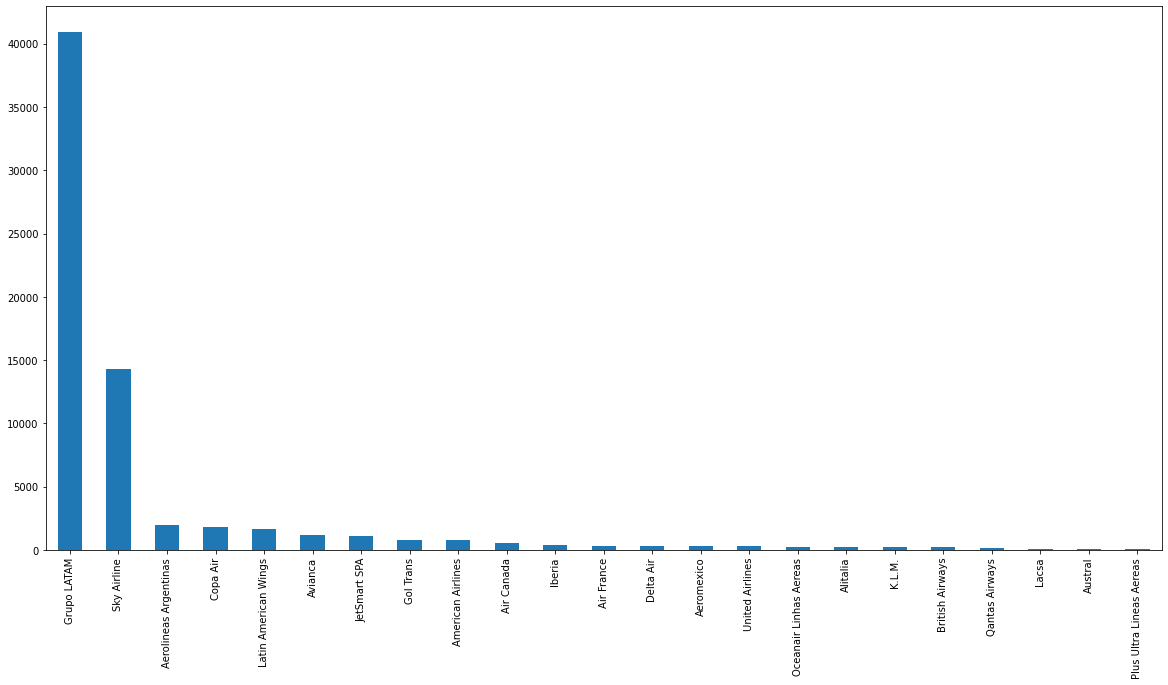

In [41]:
df['OPERA'].value_counts().plot.bar(figsize=(20,10))

Most of the flights are performed by Grupo LATAM.

## SIGLAORI

In [42]:
df['SIGLAORI'].astype('category')

0        Santiago
1        Santiago
2        Santiago
3        Santiago
4        Santiago
           ...   
68201    Santiago
68202    Santiago
68203    Santiago
68204    Santiago
68205    Santiago
Name: SIGLAORI, Length: 68206, dtype: category
Categories (1, object): ['Santiago']

Same value across all records, this field won't be considered.

## SIGLADES

In [43]:
df['SIGLADES'].astype('category')

0        Miami
1        Miami
2        Miami
3        Miami
4        Miami
         ...  
68201     Lima
68202     Lima
68203     Lima
68204     Lima
68205     Lima
Name: SIGLADES, Length: 68206, dtype: category
Categories (62, object): ['Antofagasta', 'Arica', 'Asuncion', 'Atlanta', ..., 'Tucuman', 'Ushuia', 'Valdivia', 'Washington']

<AxesSubplot:>

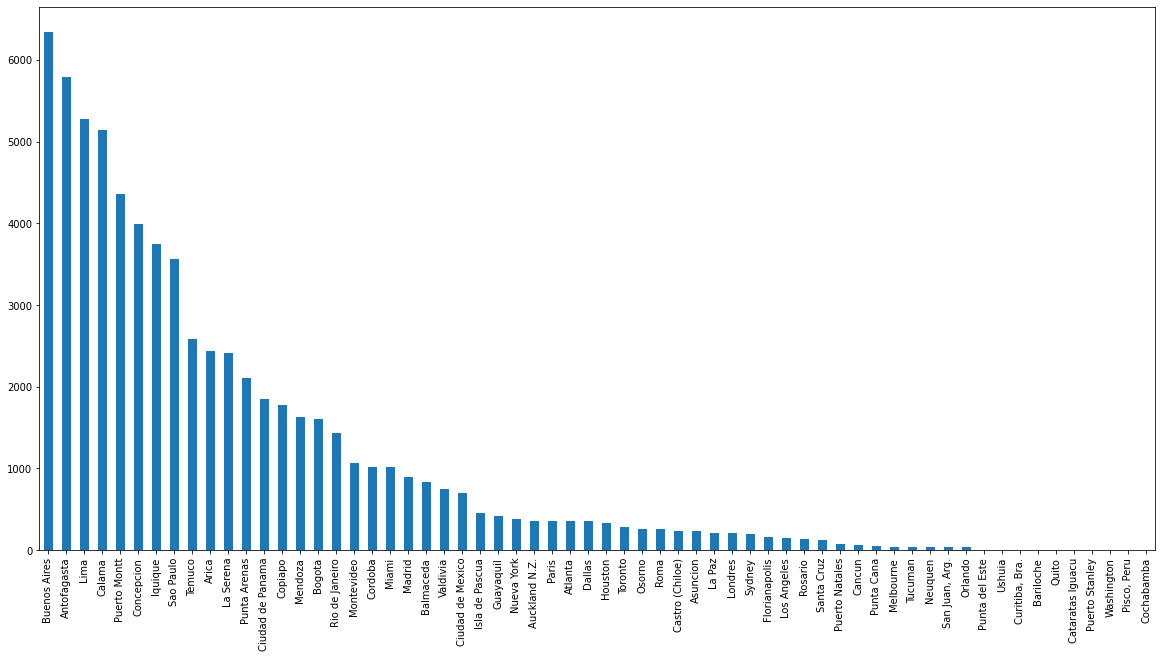

In [44]:
df['SIGLADES'].value_counts().plot.bar(figsize=(20,10))

This field is almost the same as Des-O, so it won't be considered as it's redundant.

## Conclusions

- Vlo-I and Vlo-O have similar distribution, but they also show that the actual flight is the one scheduled at the beginning. The same happens with Des-I, Des-O and Emp-I, Emp-O.
- In the case of Emp-I and Emp-O, there are thousands of cases where those values are not the same, so a new feature (Emp-diff) was added and will be later evaluated if this information is useful or not.
- Ori-I and Ori-O are discarded because they have a unique value.
- Date fields have the following behavior:
    - DIA: data looks like it's equally distributed.
    - MES: some months have higher number of flights which is expected because there are temporal factors that impact on this (festivities, vacations, and more)
    - AÑO: Almost all data is from 2017, so this field will be discarded as well.
    - DIANOM: Saturdays are the days with less flights, but they are still relevant.
- The type of flight is also useful because it can be seen that more than halve of the flights are national ones, but the international flights are close to that too.

## Adding requested fields

### high_season

In [102]:
def get_high_season(datetime):
    is_high_season = (datetime.month >= 12 and datetime.day >= 15) or \
        (datetime.month <= 3 and datetime.day <= 3) or \
        (datetime.month == 7 and datetime.day >= 15 and datetime.day <= 31) or \
        (datetime.month == 9 and datetime.day >= 11 and datetime.day <= 30)
        
    return int(is_high_season)

In [103]:
df['high_season'] = df['Fecha-I'].apply(lambda datetime: get_high_season(datetime))

### min_diff

In [106]:
df['min_diff'] = ((df['Fecha-O'] - df['Fecha-I']).dt.total_seconds() / 60).astype('int')

### delay_15

In [86]:
df['delay_15'] = df['min_diff'].apply(lambda diff: 1 if diff > 15 else 0)

<AxesSubplot:>

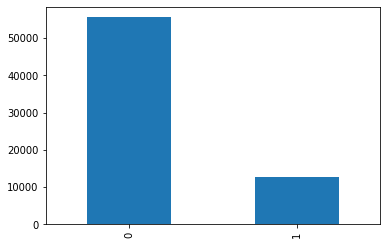

In [293]:
df['delay_15'].value_counts().plot.bar()

<AxesSubplot:>

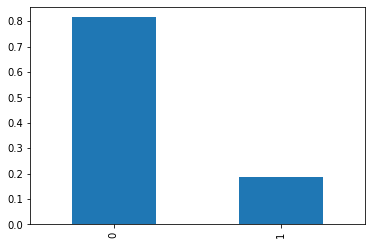

In [294]:
df['delay_15'].value_counts(normalize=True).plot.bar()

**This is an imbalanced dataset case, so f1 score weighted is the metric that will be used.**

### period_day

In [97]:
def get_period_day(datetime):
    if datetime.hour >= 5 and datetime.hour < 12:
        return 'morning'
    elif datetime.hour >= 12 and datetime.hour < 19:
        return 'afternoon'
    else:
        return 'night'

In [99]:
df['period_day'] = df['Fecha-I'].apply(lambda datetime: get_period_day(datetime))

### Exporting synthetic features

In [107]:
df[['high_season', 'min_diff', 'delay_15', 'period_day']].to_csv('synthetic_features.csv')

## Looking for delay rate behavior

### Des-I

In [168]:
desI_delay_df = df[df['delay_15'] == 1].groupby('Des-I').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

In [169]:
desI_delay_df

,count
Des-I,
SPJC,1214.0
SBGR,881.0
SCFA,847.0
SABE,830.0
SAEZ,790.0
SCTE,734.0
SCDA,640.0
SCCF,629.0
SCIE,625.0


Filtering to the top 10

In [170]:
(desI_delay_df['count'] / len(df))[:10]

Des-I
SPJC    0.017799
SBGR    0.012917
SCFA    0.012418
SABE    0.012169
SAEZ    0.011583
SCTE    0.010762
SCDA    0.009383
SCCF    0.009222
SCIE    0.009163
SAME    0.006495
Name: count, dtype: float64

In [147]:
sum((desI_delay_df['count'] / len(df))[:10])

0.11191097557399643

This 10 scheduled destinations represent 11.1% of flights with delay

Visualizing number of delayed flights per scheduled destination:

<AxesSubplot:xlabel='Des-I'>

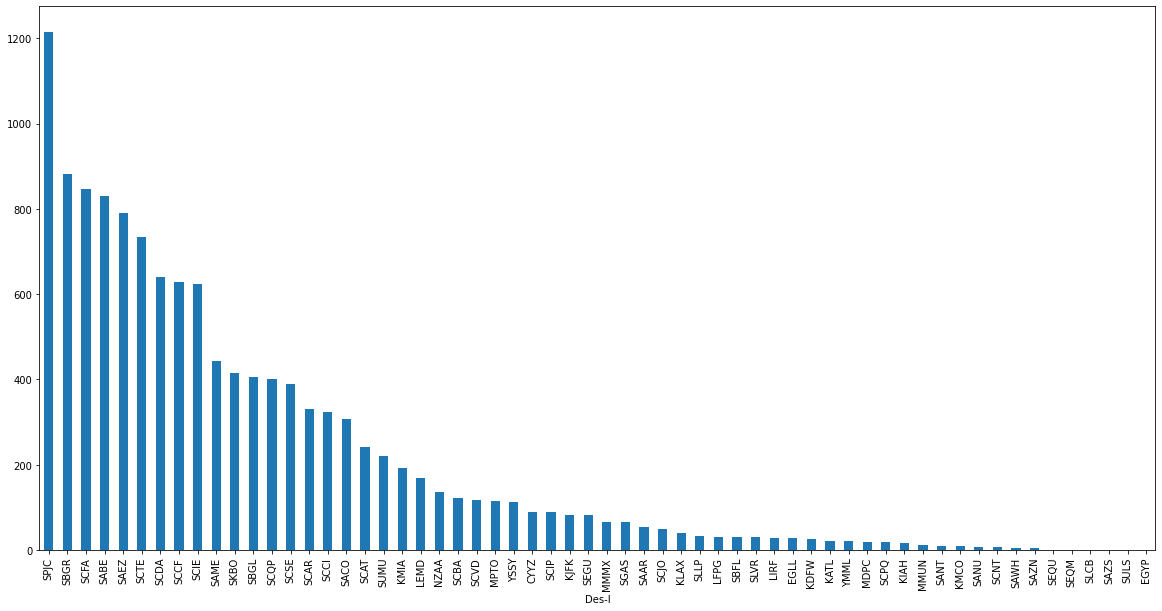

In [158]:
desI_delay_df['count'].plot.bar(figsize=(20,10))

### Des-O

In [171]:
desO_delay_df = df[df['delay_15'] == 1].groupby('Des-O').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

In [172]:
desO_delay_df

,count
Des-O,
SPJC,1214.0
SBGR,881.0
SCFA,847.0
SABE,827.0
SAEZ,793.0
SCTE,734.0
SCDA,640.0
SCCF,629.0
SCIE,623.0


Filtering to the top 10

In [152]:
(desO_delay_df['count'] / len(df))[:10]

Des-O
SPJC    0.017799
SBGR    0.012917
SCFA    0.012418
SABE    0.012125
SAEZ    0.011627
SCTE    0.010762
SCDA    0.009383
SCCF    0.009222
SCIE    0.009134
SAME    0.006495
Name: count, dtype: float64

In [153]:
sum((desO_delay_df['count'] / len(df))[:10])

0.11188165264053017

This 10 actual destinations represent 11.1% of flights with delay

Visualizing number of delayed flights per actual destination:

<AxesSubplot:xlabel='Des-O'>

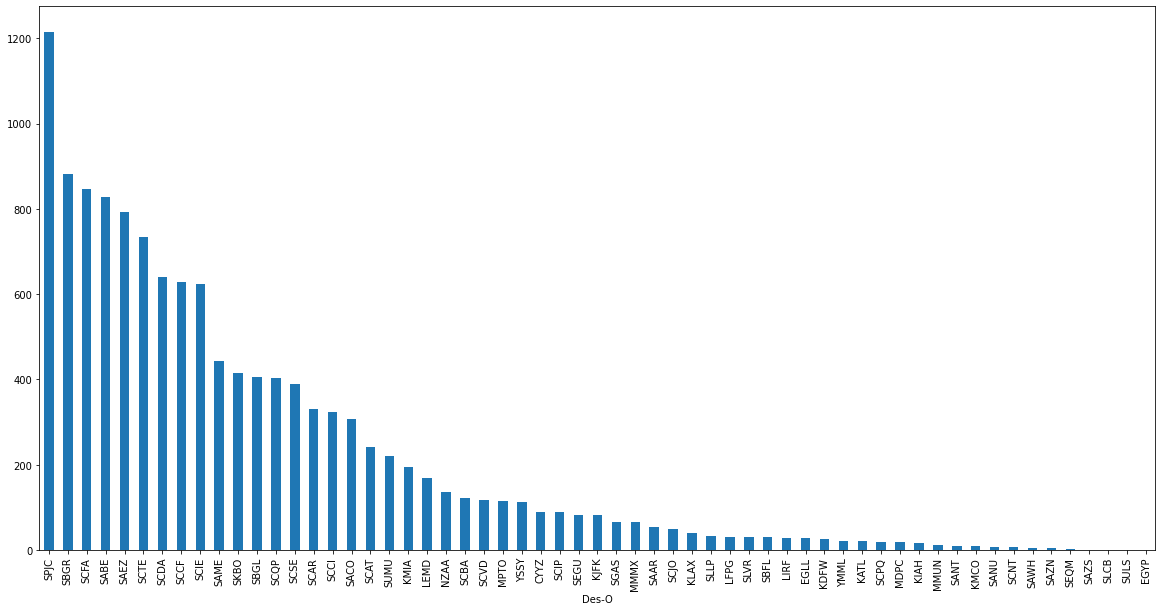

In [159]:
desO_delay_df['count'].plot.bar(figsize=(20,10))

### Emp-I

In [173]:
empI_delay_df = df[df['delay_15'] == 1].groupby('Emp-I').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

In [174]:
empI_delay_df

,count
Emp-I,
LAN,6453.0
SKU,2540.0
TAM,780.0
LAW,642.0
ARG,468.0
AVA,306.0
GLO,287.0
ACA,258.0
JAT,196.0


Filtering to the top 10

In [163]:
(empI_delay_df['count'] / len(df))[:10]

Emp-I
LAN    0.094610
SKU    0.037240
TAM    0.011436
LAW    0.009413
ARG    0.006862
AVA    0.004486
GLO    0.004208
ACA    0.003783
JAT    0.002874
CMP    0.001701
Name: count, dtype: float64

In [164]:
sum((empI_delay_df['count'] / len(df))[:10])

0.17661202826730787

This 10 scheduled airlines represent 17.6% of flights with delay

Visualizing number of delayed flights per scheduled airline:

<AxesSubplot:xlabel='Emp-I'>

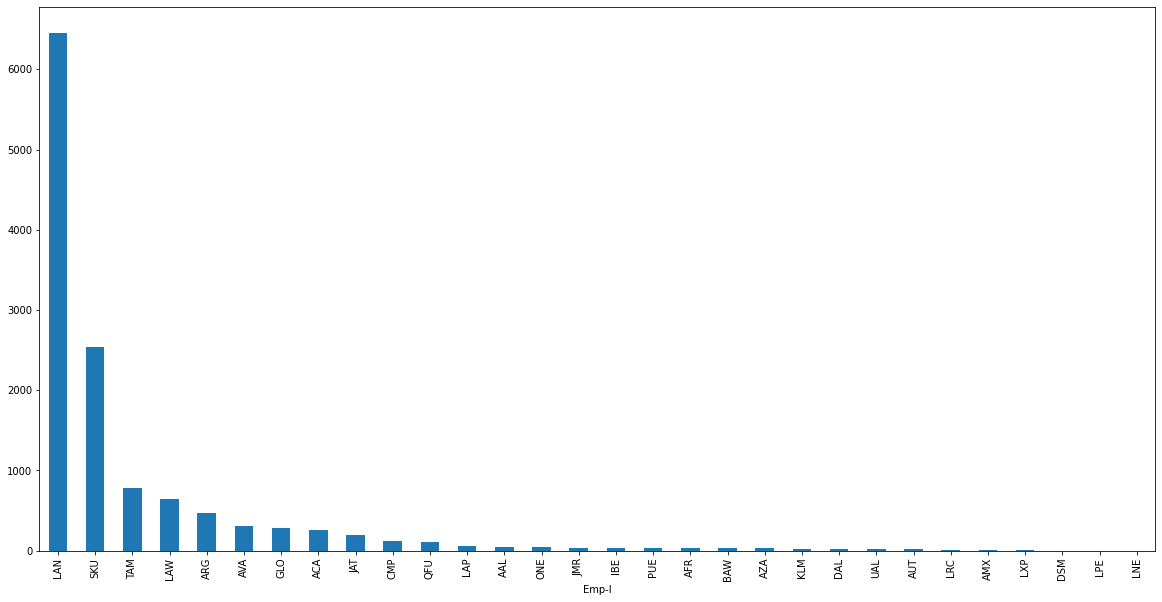

In [165]:
empI_delay_df['count'].plot.bar(figsize=(20,10))

It looks like LAN has the most number of delayed flights, however, it is important to look at the ratio of delayed flights based on their total flights.

In [214]:
emp_delay_rate_df = df[df['delay_15'] == 1].groupby('Emp-I').describe()['delay_15'][['count']] / df.groupby('Emp-I').describe()['delay_15'][['count']]

In [215]:
emp_delay_rate_df = pd.DataFrame({'emp': emp_delay_rate_df.index.tolist(), 'rate': emp_delay_rate_df['count'].values})

<AxesSubplot:xlabel='emp'>

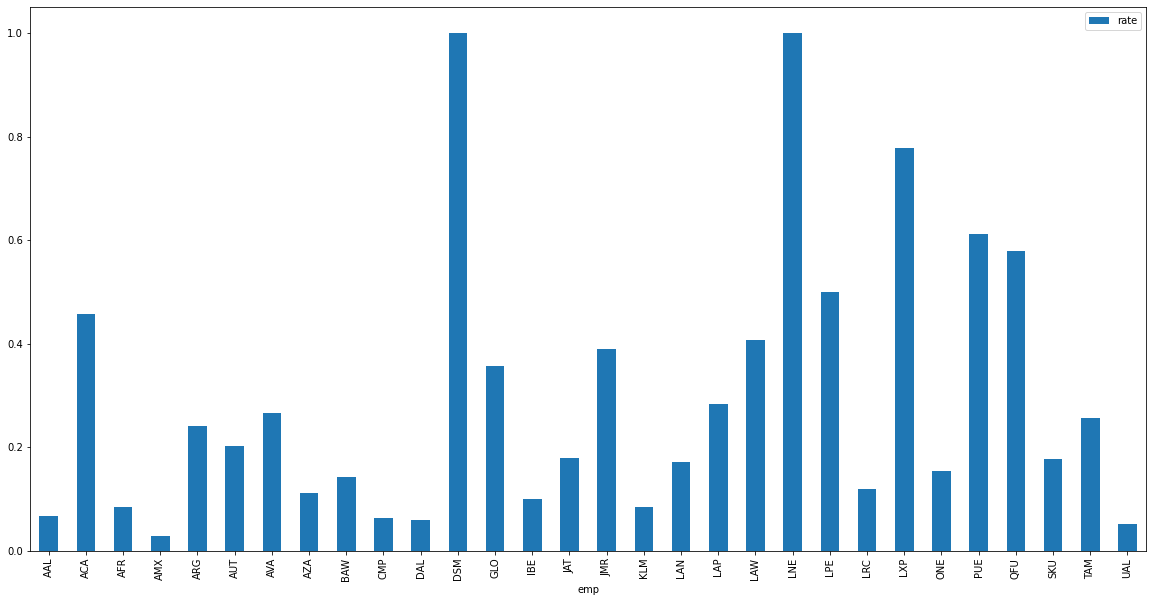

In [216]:
emp_delay_rate_df.set_index('emp').plot.bar(figsize=(20,10))

Even though LAN seemed to have the most number of delayed flights, turns out it represents less than 20% of their total flights, which is less than other airlines. However, those airlines have a few flights, so it still not fair to claim they "most of the time" are delayed. This is an interesting feature to look up when more data is available for the rest.

### Emp-O

In [175]:
empO_delay_df = df[df['delay_15'] == 1].groupby('Emp-O').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

In [176]:
empO_delay_df

,count
Emp-O,
LAN,3876.0
SKU,2540.0
LXP,2068.0
TAM,779.0
JMR,668.0
ARG,466.0
GLO,287.0
LPE,281.0
AVA,280.0


Filtering to the top 10

In [178]:
(empO_delay_df['count'] / len(df))[:10]

Emp-O
LAN    0.056828
SKU    0.037240
LXP    0.030320
TAM    0.011421
JMR    0.009794
ARG    0.006832
GLO    0.004208
LPE    0.004120
AVA    0.004105
ACA    0.003783
Name: count, dtype: float64

In [179]:
sum((empO_delay_df['count'] / len(df))[:10])

0.16865085183121722

This 10 scheduled airlines represent 17.8% of flights with delay

Visualizing number of delayed flights per scheduled airline:

<AxesSubplot:xlabel='Emp-O'>

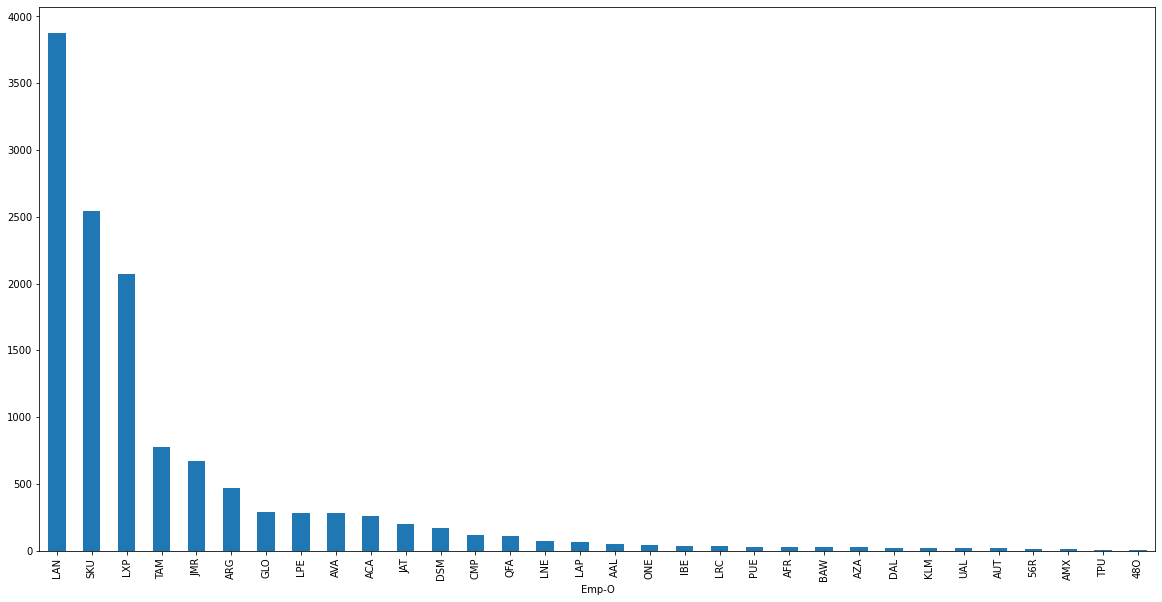

In [180]:
empO_delay_df['count'].plot.bar(figsize=(20,10))

This has a similar behavior like Emp-I

### Month of the year

In [233]:
df[df['delay_15'] == 1].groupby('MES').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

,count
MES,
7,1758.0
12,1615.0
10,1363.0
11,1199.0
8,996.0
1,978.0
9,967.0
6,852.0
2,843.0


Months 7, 12, 10 and 11 are those with more delayed flights. Let's find out their delay rate based on their total flights.

In [228]:
month_delay_rate_df = df[df['delay_15'] == 1].groupby('MES').describe()['delay_15'][['count']] / df.groupby('MES').describe()['delay_15'][['count']]

In [230]:
month_delay_rate_df = pd.DataFrame({'month': month_delay_rate_df.index.tolist(), 'rate': month_delay_rate_df['count'].values})

<AxesSubplot:xlabel='month'>

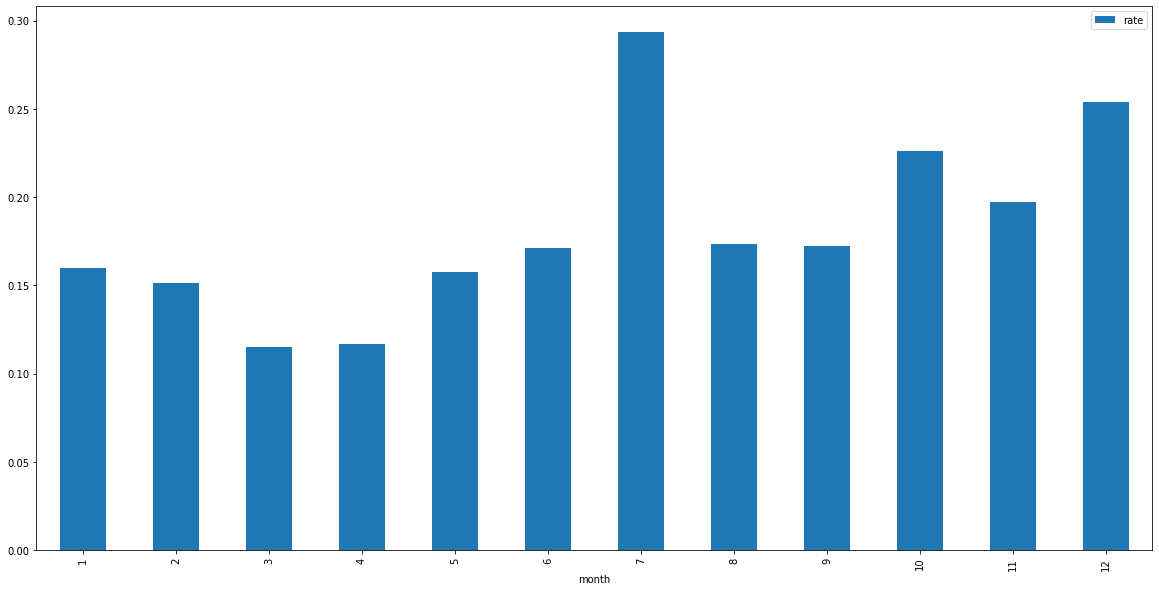

In [231]:
month_delay_rate_df.set_index('month').plot.bar(figsize=(20,10))

Months 12, 7, 10 and 11 have a higher delay rate, this could mean that the increased number of flights during those months might have some kind of impact and cause more delay rates than other months.

### Day of the week

In [234]:
df[df['delay_15'] == 1].groupby('DIANOM').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

,count
DIANOM,
Viernes,2285.0
Lunes,2048.0
Jueves,2045.0
Miercoles,1661.0
Martes,1634.0
Domingo,1578.0
Sabado,1363.0


Friday, Monday and Thursday are days with more delayed flights. Let's find out their delay rate based on their total flights.

In [235]:
day_of_week_delay_rate_df = df[df['delay_15'] == 1].groupby('DIANOM').describe()['delay_15'][['count']] / df.groupby('DIANOM').describe()['delay_15'][['count']]

In [236]:
day_of_week_delay_rate_df = pd.DataFrame({'day_of_week': day_of_week_delay_rate_df.index.tolist(), 'rate': day_of_week_delay_rate_df['count'].values})

<AxesSubplot:xlabel='day_of_week'>

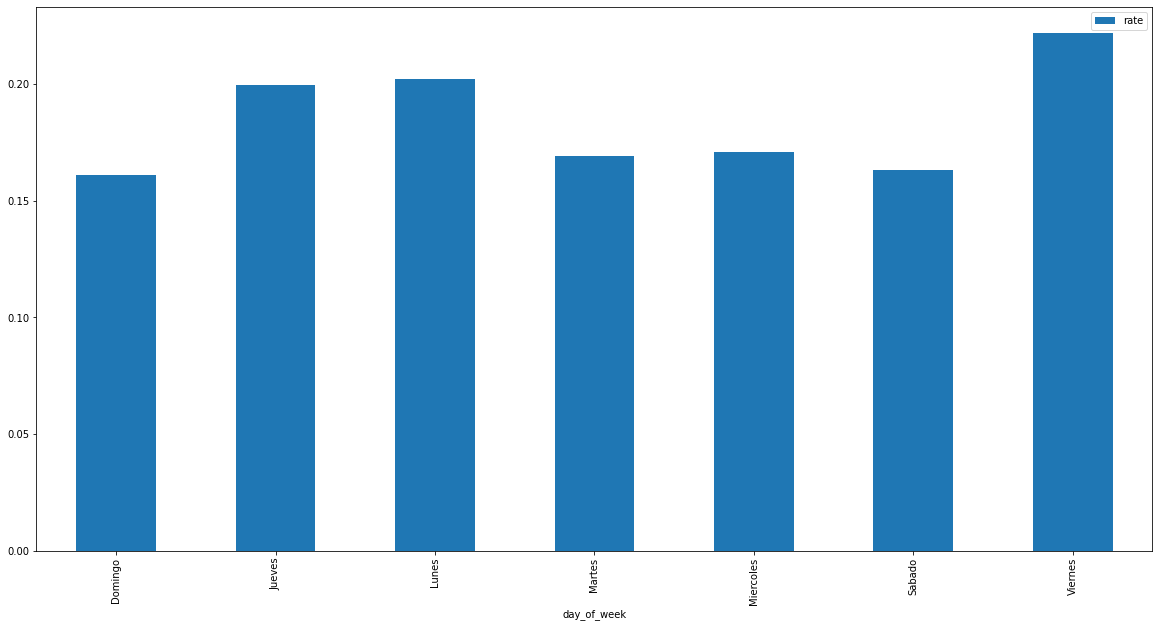

In [237]:
day_of_week_delay_rate_df.set_index('day_of_week').plot.bar(figsize=(20,10))

Friday, Monday and Thursday have higher delay rates as well, so this also tells that maybe the higher number of flights cause to increase the delay rate. However, the rate difference between days is not that much compared to months.

### high_season

In [238]:
df[df['delay_15'] == 1].groupby('high_season').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

,count
high_season,
0,9772.0
1,2842.0


There are more delayed flights when it's not high season, which is counter intuitive because one would expect that a higher number of fligths lead to a higher number of delayed fligths.

In [239]:
high_season_delay_rate_df = df[df['delay_15'] == 1].groupby('high_season').describe()['delay_15'][['count']] / df.groupby('high_season').describe()['delay_15'][['count']]

In [240]:
high_season_delay_rate_df = pd.DataFrame({'high_season': high_season_delay_rate_df.index.tolist(), 'rate': high_season_delay_rate_df['count'].values})

<AxesSubplot:xlabel='high_season'>

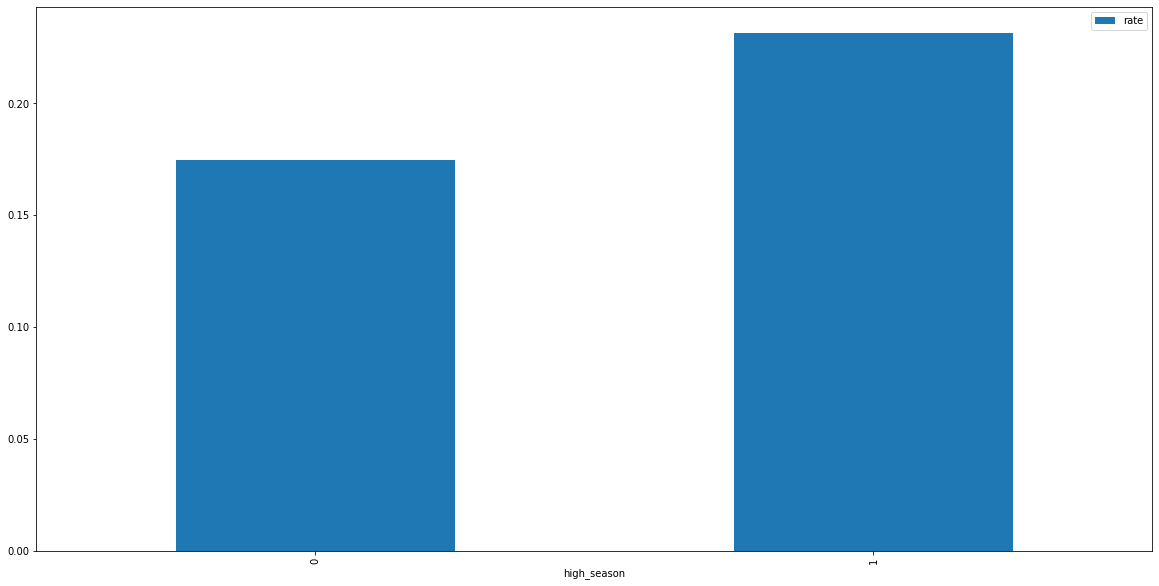

In [241]:
high_season_delay_rate_df.set_index('high_season').plot.bar(figsize=(20,10))

Turns out that high season flights have more delay rate!

### Type of flights

In [244]:
df[df['delay_15'] == 1].groupby('TIPOVUELO').describe()['delay_15'].sort_values(by='count', ascending=False)[['count']]

,count
TIPOVUELO,
I,7048.0
N,5566.0


There are more delayed flights of type I even though there are more N flights in total

In [245]:
type_delay_rate_df = df[df['delay_15'] == 1].groupby('TIPOVUELO').describe()['delay_15'][['count']] / df.groupby('TIPOVUELO').describe()['delay_15'][['count']]

In [246]:
type_delay_rate_df = pd.DataFrame({'type': type_delay_rate_df.index.tolist(), 'rate': type_delay_rate_df['count'].values})

<AxesSubplot:xlabel='type'>

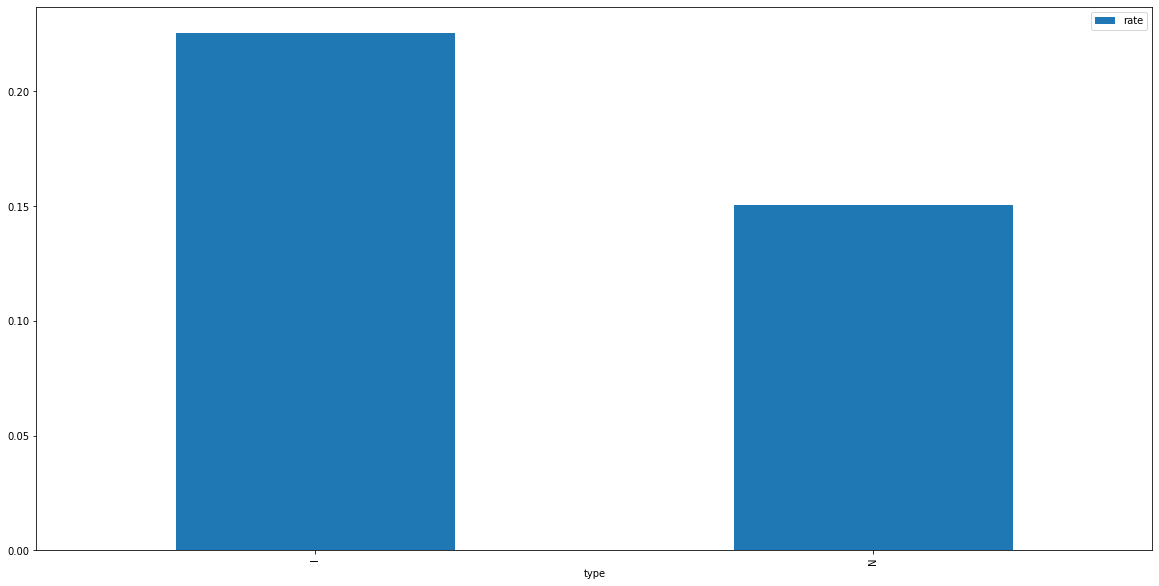

In [247]:
type_delay_rate_df.set_index('type').plot.bar(figsize=(20,10))

International flights have a higher delay rate than national ones.

### Conclusions

The following variables are expected to have most influence in predicting delays:
- Des-I
- Des-O
- Emp-I
- Emp-O
- Month
- High season
- Type

## Selected fields to be used

The following fields will be used:
- Vlo-I
- Des-I
- Emp-I
- Vlo-O
- Des-O
- Emp-O
- DIA
- MES
- DIANOM
- TIPOVUELO
- OPERA
- high_season
- period_day
- Emp-diff

Target: delay_15

## Preprocessing fields

In [255]:
copy_df = df.copy()

In [260]:
copy_df = pd.get_dummies(copy_df, columns=['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season', 'period_day', 'Emp-diff'], prefix=['Vlo-I', 'Des-I', 'Emp-I', 'Vlo-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'DIANOM', 'TIPOVUELO', 'OPERA', 'high_season', 'period_day', 'Emp-diff'])

In [262]:
df.columns

Index(['Fecha-I', 'Vlo-I', 'Ori-I', 'Des-I', 'Emp-I', 'Fecha-O', 'Vlo-O',
       'Ori-O', 'Des-O', 'Emp-O', 'DIA', 'MES', 'AÑO', 'DIANOM', 'TIPOVUELO',
       'OPERA', 'SIGLAORI', 'SIGLADES', 'Emp-diff', 'high_season', 'min_diff',
       'delay_15', 'period_day'],
      dtype='object')

In [264]:
target_df = copy_df[['delay_15']]

In [271]:
cols_to_remove = ['Fecha-I', 'Fecha-O', 'AÑO', 'SIGLAORI', 'SIGLADES', 'min_diff', 'delay_15', 'Ori-I', 'Ori-O']

In [275]:
X_df = copy_df.drop(columns=cols_to_remove)

In [274]:
from sklearn.model_selection import train_test_split

In [276]:
X_train, X_test, y_train, y_test = train_test_split(X_df, target_df, random_state=42, test_size=0.25, shuffle=True)

## Training

### KNN

In [277]:
from sklearn.neighbors import KNeighborsClassifier

In [286]:
knn = KNeighborsClassifier(n_neighbors=10)

In [287]:
knn.fit(X_train, y_train['delay_15'])

KNeighborsClassifier(n_neighbors=10)

In [288]:
y_pred = knn.predict(X_test)
f1, f1_w, acc, precision, recall = get_metrics(y_test, y_pred)
print(f'F1: {f1}\nF1 w: {f1_w}\nAcc: {acc}\nPrecision: {precision}\nRecall: {recall}')

F1: 0.5384467077277687
F1 w: 0.7633609602733452
Acc: 0.8182617874736101
Precision: 0.7022914515900487
Recall: 0.5440688081216143


### SGDClassifier

In [299]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score

In [300]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train['delay_15'])

SGDClassifier(random_state=42)

In [301]:
y_pred = sgd_clf.predict(X_test)
f1, f1_w, acc, precision, recall = get_metrics(y_test, y_pred)
print(f'F1: {f1}\nF1 w: {f1_w}\nAcc: {acc}\nPrecision: {precision}\nRecall: {recall}')

F1: 0.5087345246415926
F1 w: 0.7525990825877814
Acc: 0.8177926342950973
Precision: 0.7224312106168077
Recall: 0.5283344919400322


### SVM

In [305]:
from sklearn.svm import SVC

In [ ]:
svc = SVC()
svc.fit(X_train, y_train['delay_15'])

In [ ]:
y_pred = svc.predict(X_test)
f1, f1_w, acc, precision, recall = get_metrics(y_test, y_pred)
print(f'F1: {f1}\nF1 w: {f1_w}\nAcc: {acc}\nPrecision: {precision}\nRecall: {recall}')

### Random Forest

In [ ]:
import os
  
n_cpu = os.cpu_count()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model = GridSearchCV(
    RandomForestClassifier(),
    param_grid={
        'n_estimators': [100, 300],
        'max_features': ['sqrt', 'log2'],
        'max_depth': [128, 256],
        'criterion': ['gini', 'entropy'],
        'n_jobs': [n_cpu - 1]
    },
    scoring="f1_weighted",
    return_train_score=False,
    n_jobs=-1,
)

In [ ]:
model.fit(X_train, y_train['delay_15'])

In [ ]:
y_pred = model.predict(X_test)
f1, f1_w, acc, precision, recall = get_metrics(y_test, y_pred)
print(f'F1: {f1}\nF1 w: {f1_w}\nAcc: {acc}\nPrecision: {precision}\nRecall: {recall}')

# Results comparison

_SVM and RandomForest models comments not included because they didn't finish training in time yet._  

KNN and SGDClassifier performed quite similar, with an F1-score (weighted) of 0.76 and 0.75 respectively, along with accuracies of 0.81 for both of them. These models are good and can be used for the task. However, asuming that it's better to have a false positive (predict there is going to be a delay when it's actually not a delay) than a false negative, we are going to focus on which model has a better precision metric.  

SDGClassifier has a higher precision (0.72) than KNN (0.7), so the SDGClssifier would be the prefered model to work with.